In [8]:
import pandas as pd
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv('/Users/siddharth/Code/Python/CustomerChurn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [11]:
df.drop(["customerID"],axis=1,inplace = True)

def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
df['Churn'] = df[['Churn']].apply(binary_map)

# Encoding gender category
df['gender'] = df['gender'].map({'Male':1, 'Female':0})

#Encoding other binary category
binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[binary_list] = df[binary_list].apply(binary_map)

#Encoding the other categoric features with more than two categories
df = pd.get_dummies(df, drop_first=True)

<AxesSubplot: >

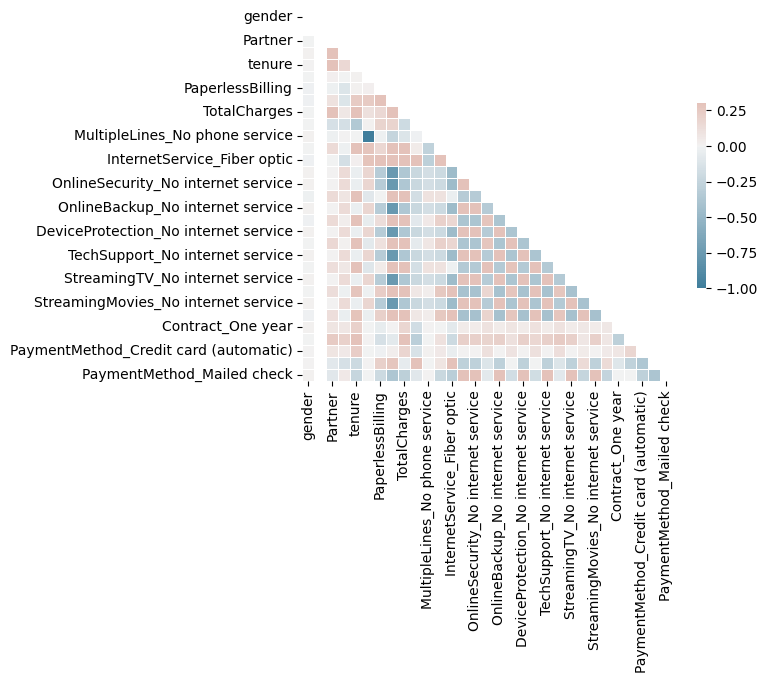

In [16]:
corr=df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
%store df

Stored 'df' (DataFrame)
